# (Homework) Week 6 - DataScience Bootcamp Fall 2025

All solution cells are replaced with `# TODO` placeholders so you can fill them in.

**Name: Vaishali Kukkala \
**Email: vk2742@nyu.edu**

---

### Problem 1: Dataset Splitting

1. You have recordings of 44 phones from 100 people; each person records ~200 phones/day for 5 days.
   - Design a valid training/validation/test split strategy that ensures the model generalizes to **new speakers**.

2. You now receive an additional dataset of 10,000 phone recordings from **Kilian**, a single speaker.
   - You must train a model that performs well **specifically for Kilian**, while also maintaining generalization.

*Describe your proposed split strategy and reasoning.* (Theory)

Take the original dataset and split by speakers (not recordings). For example, training data = 70, validation would be 15 and testing would be 15 speakers. 

Include most of Kilian's recordings in training (e.g., 80%) so the model learns patterns that are specific to Kilian. 

Validation set has both original speakers and a small portion of the Kilian's data. 

For the testing: the original speakers will not be a part of it, allows the model to use new speakers and then measure performance for target speakers. 

### Problem 2: K-Nearest Neighbors

1. **1-NN Classification:** Given dataset:

   Positive: (1,2), (1,4), (5,4)

   Negative: (3,1), (3,2)

   Plot the 1-NN decision boundary and classify new points visually.

2. **Feature Scaling:** Consider dataset:

   Positive: (100,2), (100,4), (500,4)

   Negative: (300,1), (300,2)

   What would the 1-NN classify point (500,1) as **before and after scaling** to [0,1] per feature?

3. **Handling Missing Values:** How can you modify K-NN to handle missing features in a test point?

4. **High-dimensional Data:** Why can K-NN still work well for images even with thousands of pixels?


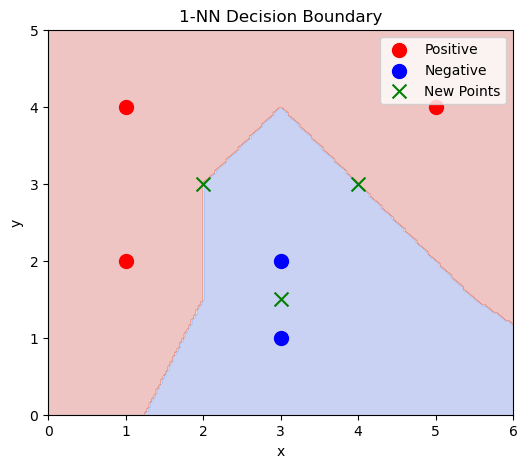

In [1]:
# Question 1 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

X = np.array([
    [1,2], [1,4], [5,4],
    [3,1], [3,2]
])
y = np.array([1,1,1,0,0])  # 1 = Positive, 0 = Negative

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

xx, yy = np.meshgrid(np.linspace(0,6,200), np.linspace(0,5,200))
grid = np.c_[xx.ravel(), yy.ravel()]
preds = knn.predict(grid).reshape(xx.shape)

plt.figure(figsize=(6,5))
plt.contourf(xx, yy, preds, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X[y==1][:,0], X[y==1][:,1], color='red', label='Positive', s=100)
plt.scatter(X[y==0][:,0], X[y==0][:,1], color='blue', label='Negative', s=100)

new_points = np.array([[2,3],[4,3],[3,1.5]])
plt.scatter(new_points[:,0], new_points[:,1], color='green', marker='x', s=100, label='New Points')

plt.xlabel('x')
plt.ylabel('y')
plt.title('1-NN Decision Boundary')
plt.legend()
plt.show()

In [2]:
# Question 2
from sklearn.preprocessing import MinMaxScaler

X2 = np.array([
    [100,2],[100,4],[500,4],
    [300,1],[300,2]
])
y2 = np.array([1,1,1,0,0])

test_point = np.array([[500,1]])

knn2 = KNeighborsClassifier(n_neighbors=1)
knn2.fit(X2, y2)
print("1-NN prediction before scaling:", knn2.predict(test_point)[0])

scaler = MinMaxScaler()
X2_scaled = scaler.fit_transform(X2)
test_scaled = scaler.transform(test_point)

knn2.fit(X2_scaled, y2)
print("1-NN prediction after scaling:", knn2.predict(test_scaled)[0])

1-NN prediction before scaling: 1
1-NN prediction after scaling: 0


Question 3

If the test point has missing features, K-NN can still work by ignoring those features in the distance calcs. Only the features present are used to compute the distance to each training point. 

Question 4 

Even with thousands of pixels, K-NN could works because local similarity is still important. Neighbouring pixels in images are correlated so Euclidean can capture the visual similarity. Using dimensionality reduction can improve the K-NN performance. 

### Problem 3: Part 1

You are given a fully trained Perceptron model with weight vector **w**, along with training set **D_TR** and test set **D_TE**.

1. Your co-worker suggests evaluating $h(x) = sign(w \cdot x)$ for every $(x, y)$ in D_TR and D_TE. Does this help determine whether test error is higher than training error?
2. Why is there no need to compute training error explicitly for the Perceptron algorithm?

1. evaluting h(x) = sign(w * x) for each point shows which points are classified correctly, but to determine whether test error is higher than training error, u need to compute the fraction of misclassified points in each set.
2. the Perceptron algorithm converges only when all training points are correctly classified, so the training error has to be zero. Therefore, there is no need to compute it explicitly.

### Problem 3: Two-point 2D Dataset (Part 2)

Run the Perceptron algorithm **by hand or in code** on the following data:

1. Positive class: (10, -2)
2. Negative class: (12, 2)

Start with $w_0 = (0, 0)$ and a learning rate of 1.

- Compute how many updates are required until convergence.
- Write down the sequence of $w_i$ vectors.

In [4]:
import numpy as np

X = np.array([[10, -2], [12, 2]])
y = np.array([1, -1])

w = np.array([0, 0], dtype=int)
learning_rate = 1
weights_sequence = [w.copy()]

converged = False
updates = 0

while not converged:
    converged = True
    for xi, yi in zip(X, y):
        if yi * np.dot(w, xi) <= 0:  # misclassified
            w = w + learning_rate * yi * xi
            weights_sequence.append(w.copy())
            updates += 1
            converged = False

print("Total updates:", updates)
print("Sequence of weight vectors:")
for i, wv in enumerate(weights_sequence):
    print(f"w{i} = {wv}")

Total updates: 9
Sequence of weight vectors:
w0 = [0 0]
w1 = [10 -2]
w2 = [-2 -4]
w3 = [ 8 -6]
w4 = [-4 -8]
w5 = [  6 -10]
w6 = [ -6 -12]
w7 = [  4 -14]
w8 = [ -8 -16]
w9 = [  2 -18]


### Problem 4: Reconstructing the Weight Vector

Given the log of Perceptron updates:

| x | y | count |
|---|---|--------|
| (0, 0, 0, 0, 4) | +1 | 2 |
| (0, 0, 6, 5, 0) | +1 | 1 |
| (3, 0, 0, 0, 0) | -1 | 1 |
| (0, 9, 3, 6, 0) | -1 | 1 |
| (0, 1, 0, 2, 5) | -1 | 1 |

Assume learning rate = 1 and initial weight $w_0 = (0, 0, 0, 0, 0)$.

Compute the final weight vector after all updates.

In [5]:
updates = [
    (np.array([0,0,0,0,4]),  1, 2),
    (np.array([0,0,6,5,0]),  1, 1),
    (np.array([3,0,0,0,0]), -1, 1),
    (np.array([0,9,3,6,0]), -1, 1),
    (np.array([0,1,0,2,5]), -1, 1)
]

w = np.zeros(5, dtype=int)
learning_rate = 1

for x, y, count in updates:
    w += learning_rate * y * x * count

print("Final weight vector:", w)

Final weight vector: [ -3 -10   3  -3   3]


### Problem 5: Visualizing Perceptron Convergence

Implement a Perceptron on a small 2D dataset with positive and negative examples.

- Plot the data points.
- After each update, visualize the decision boundary.
- Show how it converges to a stable separator.

In [ ]:
#Todo